## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
cars_data=pd.read_csv('Cars (1).csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

Dependent Variable: MPG; Independent Variable: HP, VOL, WT

### 3.1 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [6]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


### 3.2 ASSUMPTIONS CHECK

#### 1.Normality Test

1. Distplot
2. Histogram
3. QQ-Plot
45. Probability plot

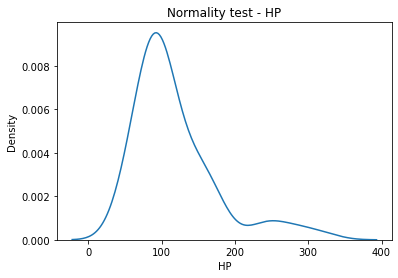

In [7]:
sns.distplot(a=cars_data['HP'], hist=False)
plt.title('Normality test - HP')
plt.show()

In [8]:
cars_data['HP'].skew()

1.7162163889158817

In [9]:
cars_data['HP'].kurtosis()

2.960024672046334

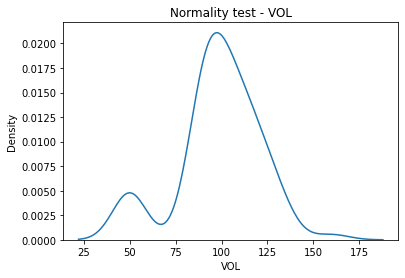

In [10]:
sns.distplot(a=cars_data['VOL'], hist=False)
plt.title('Normality test - VOL')
plt.show()

In [11]:
cars_data['VOL'].skew()

-0.5901968186877561

In [12]:
cars_data['VOL'].kurtosis()

0.9202285729168072

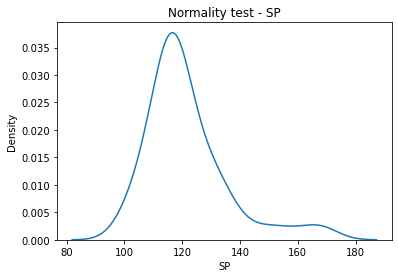

In [13]:
sns.distplot(a=cars_data['SP'], hist=False)
plt.title('Normality test - SP')
plt.show()

In [14]:
cars_data['SP'].skew()

1.6114501961773586

In [15]:
cars_data['SP'].kurtosis()

2.9773289437871835

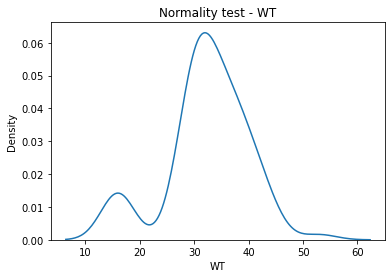

In [16]:
sns.distplot(a=cars_data['WT'], hist=False)
plt.title('Normality test - WT')
plt.show()

In [17]:
cars_data['WT'].skew()

-0.6147533255357768

In [18]:
cars_data['WT'].kurtosis()

0.9502914910300326

#### Normality test is Failed

#### Normality Test using Probplot

In [3]:
from scipy import stats

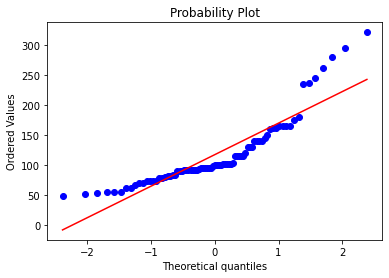

In [20]:
stats.probplot(x=cars_data['HP'], dist='norm', plot=plt) #Calculate quantiles for a probability plot, and optionally show the plot.
plt.show()

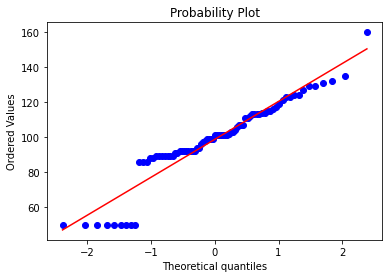

In [21]:
stats.probplot(x=cars_data['VOL'], dist='norm', plot=plt)
plt.show()

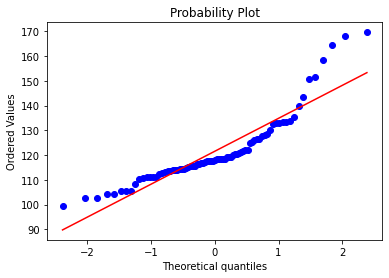

In [22]:
stats.probplot(x=cars_data['SP'], dist='norm', plot=plt)
plt.show()

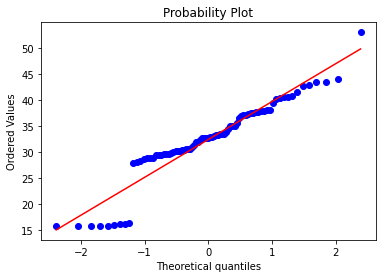

In [23]:
stats.probplot(x=cars_data['WT'], dist='norm', plot=plt)
plt.show()

#### Normality test Failes

#### 2.Linearity Test

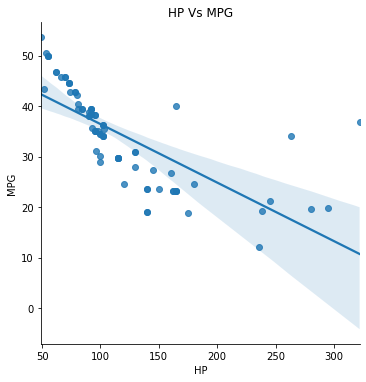

In [24]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

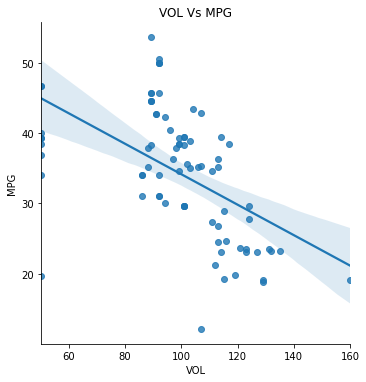

In [25]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

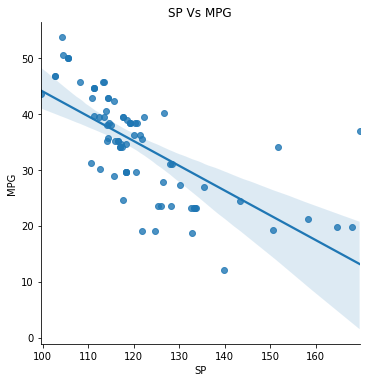

In [26]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

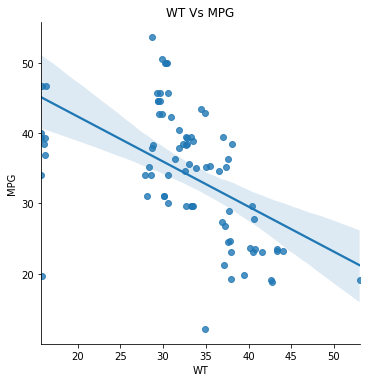

In [27]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

#### Linearity test also Failed

#### 3. Multi-collinearity

Can be performed using 2 techniques:

1. Correlation Matrix
2. Variance Inflation Factor [VIF]

In [28]:
cars_data_corr_matrix=cars_data.corr().round(2)
cars_data_corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


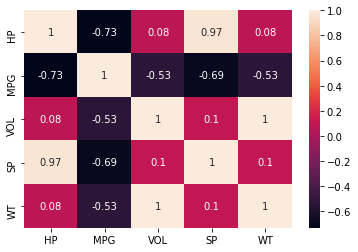

In [29]:
sns.heatmap(data=cars_data_corr_matrix, annot=True)
plt.show()

#### Multicollinearity problem exists

#### 4. Autoregression Test

No time based inputs

#### 5. Homoskedasticity Check | 6. Zero Residual Mean Check

This can be done post model training.

#### NOTE:

For homoskedasticity check, all our **input features must be in a similar scale.**

## =====================================================================

## Let's create a Reference data to understand how the x feature should behave with y

In [30]:
import numpy as np

In [31]:
x=np.random.randn(81)
y=10*x+np.random.randn(81)*2

In [32]:
ref_data=pd.DataFrame(data={'X':x, 'y':y})
ref_data

,X,y
0,0.227917,-2.489571
1,-0.386691,-2.962411
2,-0.264040,-1.972673
3,0.509288,3.105530
4,-0.566561,-7.695013
...,...,...
76,0.378365,0.980438
77,-0.092482,-0.335463
78,-1.903937,-16.166970
79,0.470475,5.723531


#### 1. Linearity Test

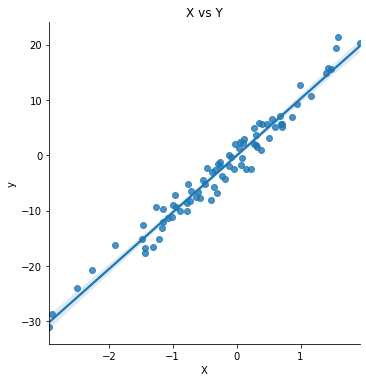

In [33]:
sns.lmplot(x='X',y='y',data=ref_data)
plt.title('X vs Y')
plt.show()

#### Linearity Test is Passed

#### 2. Normality Test

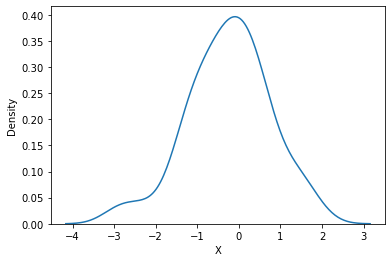

In [34]:
sns.distplot(a=ref_data['X'], hist=False)
plt.show()

In [35]:
ref_data['X'].skew()

-0.3339326632230836

In [36]:
ref_data['X'].kurtosis()

0.382054416184606

**Using Probplot**

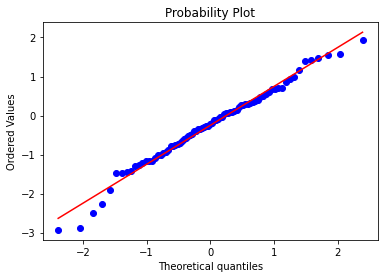

In [37]:
stats.probplot(x=ref_data['X'], dist='norm', plot=plt)
plt.show()

#### Normality test is Passed

#### 3. Multicollinearity Test - Passed

#### 4. AutoRegresssion Test - Passed

#### 5. Homoscedasticity Test || 6. Zero Residual Mean

## Model Building 

In [38]:
X=ref_data[['X']]
y=ref_data[['y']]

## Model Training using Sklearn library

In [39]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression() #Object Creation/ Model Initialization
linear_model.fit(X,y)

LinearRegression()

In [40]:
linear_model.coef_

array([[10.25892846]])

## Model Testing

In [41]:
y_pred=linear_model.predict(X)

## Model Evaluation

In [42]:
y

,y
0,-2.489571
1,-2.962411
2,-1.972673
3,3.105530
4,-7.695013
...,...
76,0.980438
77,-0.335463
78,-16.166970
79,5.723531


In [48]:
y_pred

array([[  2.27708344],
       [ -4.02813524],
       [ -2.76986688],
       [  5.16365222],
       [ -5.87341091],
       [-11.11479166],
       [ 16.17938273],
       [ -0.41793831],
       [ -2.7511579 ],
       [-10.34248627],
       [ 15.02085729],
       [ -4.87357852],
       [ -3.57398305],
       [ -8.01999791],
       [ -3.65835161],
       [  6.89634749],
       [-13.43142187],
       [ 11.91281232],
       [ -6.61970252],
       [ -5.09413498],
       [ -7.53654028],
       [-12.94221405],
       [-23.22609565],
       [ -2.40935723],
       [  0.52401495],
       [  1.45633851],
       [-15.28231512],
       [ 15.93342664],
       [ 14.30516032],
       [ -4.13457676],
       [ -6.18388944],
       [-12.09202488],
       [-11.8740627 ],
       [  3.9549192 ],
       [  5.66000305],
       [  7.22680161],
       [ -1.22129548],
       [  7.03544654],
       [  9.66008848],
       [-25.60693749],
       [-12.46084735],
       [-15.10432519],
       [  3.09334577],
       [  3

In [44]:
error=y-y_pred
error

,y
0,-4.766655
1,1.065724
2,0.797193
3,-2.058123
4,-1.821602
...,...
76,-2.840079
77,0.674399
78,3.426481
79,0.958055


#### 5. Homoscadasticity Check

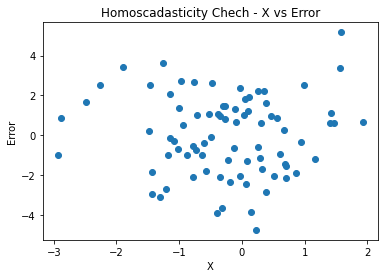

In [45]:
plt.scatter(x=ref_data['X'],y=error,)
plt.title('Homoscadasticity Chech - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

#### 6. Zero Residual Mean Test

It is a plot b/w our **Actual output vs Predicted output**

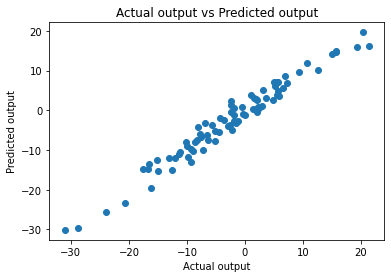

In [46]:
plt.scatter(x=y,y=y_pred,)
plt.title('Actual output vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

#### Zero residual test is passed

## =====================================================================

### COME BACK TO CARS DATA

In [49]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## Model Building

In [51]:
X=cars_data.drop(['MPG'],axis=1)
y=cars_data[['MPG']]

In [60]:
X.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

### Scaling data

In [65]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
X_scaled=std_scalar.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


#### Before Scaling

In [62]:
cars_data.mean()

HP     117.469136
MPG     34.422076
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [63]:
cars_data.std()

HP     57.113502
MPG     9.131445
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

#### After Scaling

In [66]:
X_scaled.mean()

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [67]:
X_scaled.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

## Model Training

In [68]:
linear_model_2=LinearRegression()
linear_model_2.fit(X_scaled,y)

LinearRegression()

In [69]:
linear_model_2.coef_

array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]])

In [70]:
linear_model_2.intercept_

array([34.42207573])

## Model Testing

In [71]:
y_pred=linear_model_2.predict(X_scaled)

## Model Evaluation

In [72]:
error_cars=y-y_pred
error

,y
0,-4.766655
1,1.065724
2,0.797193
3,-2.058123
4,-1.821602
...,...
76,-2.840079
77,0.674399
78,3.426481
79,0.958055


#### 5. Homoscadasticity Check

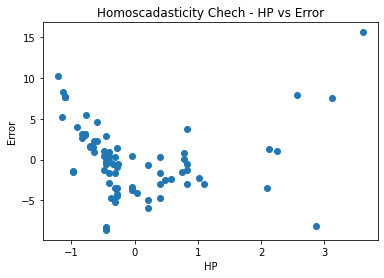

In [74]:
plt.scatter(x=cars_data['HP'],y=error_cars)
plt.title('Homoscadasticity Chech - HP vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

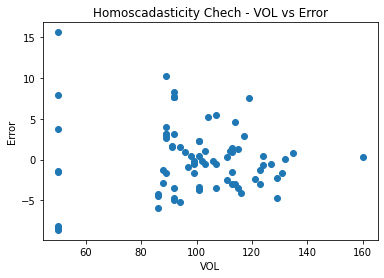

In [76]:
plt.scatter(x=cars_data['VOL'],y=error_cars)
plt.title('Homoscadasticity Chech - VOL vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

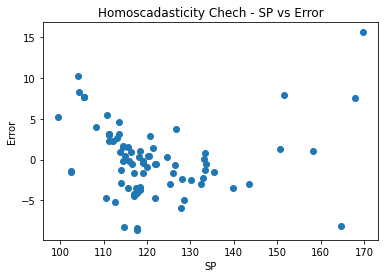

In [78]:
plt.scatter(x=cars_data['SP'],y=error_cars)
plt.title('Homoscadasticity Chech - SP vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

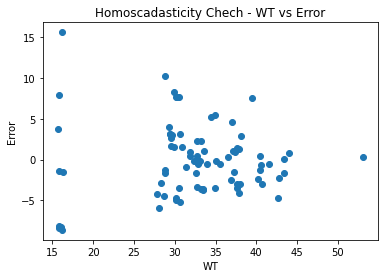

In [79]:
plt.scatter(x=cars_data['WT'],y=error_cars)
plt.title('Homoscadasticity Chech - WT vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

#### Homoscadasticity test Failed

#### 6. Zero Residual Mean Test

It is a plot b/w our **Actual output vs Predicted output**

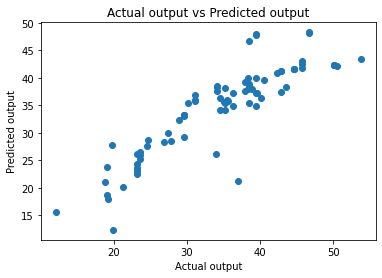

In [80]:
plt.scatter(x=y,y=y_pred,)
plt.title('Actual output vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

#### Zero residual mean test also Failed

## =================================================================

# Model Optimization Techniques

In [4]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Model Building | Model Training using Statsmodels

In [5]:
import statsmodels.formula.api as smf

In [6]:
model=smf.ols(formula='MPG~VOL+HP+SP+WT', data=cars_data).fit()

In [7]:
model.params

Intercept    30.677336
VOL          -0.336051
HP           -0.205444
SP            0.395627
WT            0.400574
dtype: float64

In [8]:
model.pvalues

Intercept    0.042936
VOL          0.556294
HP           0.000001
SP           0.014579
WT           0.813649
dtype: float64

## =====================================================================

### Hypothesis Statement:

* H0: This feature is not significant for prediction.
* H1: This is a significant for prediction.

LOS=5%

## =====================================================================

In [9]:
model_1=smf.ols(formula='MPG~HP', data=cars_data).fit()
#model_1.pvalues
#model_1.summary()
print('R-square                             :', round(model_1.rsquared,4))
print('Adjisted R-square                    :', round(model_1.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_1.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_1.bic,4))
print('P-Values of slope                    :', model_1.pvalues[1])

R-square                             : 0.5257
Adjisted R-square                    : 0.5197
Akaike Information Criterian(AIC)    : 530.7453
Bayesian Information Criterian(BIC)  : 535.5342
P-Values of slope                    : 1.9564901191848592e-14


When we see each feature, each feature is significant to y

In [10]:
model_2=smf.ols(formula='MPG~HP+SP', data=cars_data).fit()
print('R-square                             :', round(model_2.rsquared,4))
print('Adjisted R-square                    :', round(model_2.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_2.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_2.bic,4))
print('P-Values of slope                    :', model_2.pvalues[1:3])

R-square                             : 0.5326
Adjisted R-square                    : 0.5207
Akaike Information Criterian(AIC)    : 531.5481
Bayesian Information Criterian(BIC)  : 538.7315
P-Values of slope                    : HP    0.002129
SP    0.284508
dtype: float64


When 2 features are correlated the p values get effected

In [11]:
model_3=smf.ols(formula='MPG~HP+SP+VOL', data=cars_data).fit()
print('R-square                             :', round(model_3.rsquared,4))
print('Adjisted R-square                    :', round(model_3.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_3.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_3.bic,4))
print('P-Values of slope                    :', model_3.pvalues[1:4])

R-square                             : 0.7704
Adjisted R-square                    : 0.7614
Akaike Information Criterian(AIC)    : 475.9875
Bayesian Information Criterian(BIC)  : 485.5653
P-Values of slope                    : HP     8.644870e-07
SP     1.207855e-02
VOL    1.648229e-13
dtype: float64


In [12]:
model_4=smf.ols(formula='MPG~HP+SP+WT', data=cars_data).fit()
print('R-square                             :', round(model_4.rsquared,4))
print('Adjisted R-square                    :', round(model_4.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_4.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_4.bic,4))
print('P-Values of slope                    :', model_4.pvalues[1:4])

R-square                             : 0.7695
Adjisted R-square                    : 0.7605
Akaike Information Criterian(AIC)    : 476.2993
Bayesian Information Criterian(BIC)  : 485.8771
P-Values of slope                    : HP    7.560276e-07
SP    1.089096e-02
WT    1.914892e-13
dtype: float64


In [13]:
model_5=smf.ols(formula='MPG~HP+SP+VOL+WT', data=cars_data).fit()
print('R-square                             :', round(model_5.rsquared,4))
print('Adjisted R-square                    :', round(model_5.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_5.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_5.bic,4))
print('P-Values of slope                    :', model_5.pvalues[1:5])

R-square                             : 0.7705
Adjisted R-square                    : 0.7585
Akaike Information Criterian(AIC)    : 477.9279
Bayesian Information Criterian(BIC)  : 489.9002
P-Values of slope                    : HP     0.000001
SP     0.014579
VOL    0.556294
WT     0.813649
dtype: float64


#### Model 4 is the Best Model.

## Model Building using Sklearn Library

#### 2 Step Approch:

1. Separate your x and y
2. Model Validation Techniques:
  * Train-Test Split
  * K-Fold CV
  * LOOCV

In [14]:
X=cars_data.drop('MPG', axis=1)
y=cars_data[['MPG']]

In [15]:
X.shape, y.shape

((81, 4), (81, 1))

In [19]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, shuffle=True, random_state=None)

In [20]:
X_train.shape, y_train.shape #Training data

((64, 4), (64, 1))

In [21]:
X_test.shape, y_test.shape #Testing data

((17, 4), (17, 1))

## Model Training

In [22]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

## Model testing.

#### Calculate the error for the Training data

In [29]:
y_pred_train=linear_model.predict(X_train)

#### Calculate the error for the Test data

In [24]:
y_pred_test=linear_model.predict(X_test)

## Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mean_squared_error(y_train, y_pred_train) # For training data

18.576743959804148

In [31]:
mean_squared_error(y_test, y_pred_test) # For training data

20.778206623650885

In [32]:
mean_absolute_error(y_train, y_pred_train)

3.2006410470181774

In [33]:
mean_absolute_error(y_test, y_pred_test)

3.5337796345780155

## =====================================================================

# Model Optimization Techniques

### TAKEAWAY:
Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

**Data transformation techniques if the data is CONTINUOUS**:
- Log Transformation
- Square Root Transformation
- Cube Root Transformation 
- Reciprocal Transformation
- Boxcox Transformation
- Standard Scaler
- Min Max Scaler
- Robust Scaler

**Data transformation techniques if the data is DISCRETE**:
- Label Encoding
- One Hot Encoding

### Applying Log Transformation

In [41]:
X_input=cars_data.copy()
X_input

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [42]:
import numpy as np

In [43]:
X_input['logHP']=np.log(X_input['HP'])
X_input['logSP']=np.log(X_input['SP'])
X_input['logVOL']=np.log(X_input['VOL'])
X_input['logWT']=np.log(X_input['WT'])
X_input

,HP,MPG,VOL,SP,WT,logHP,logSP,logVOL,logWT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


#### 2.Linearity Test

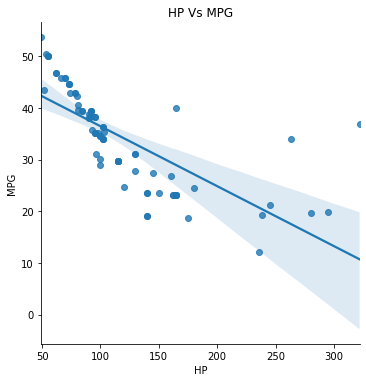

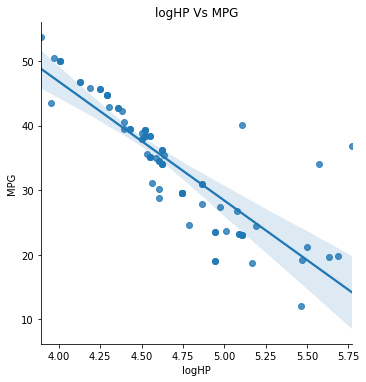

In [45]:
sns.lmplot(x='HP',y='MPG',data=X_input)
plt.title('HP Vs MPG')

sns.lmplot(x='logHP',y='MPG',data=X_input)
plt.title('logHP Vs MPG')
plt.show()

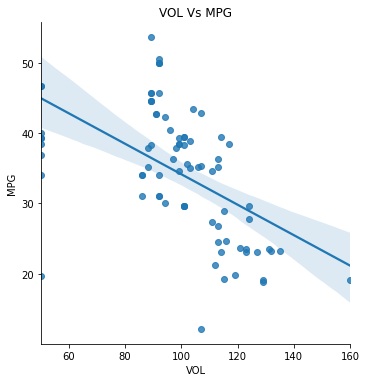

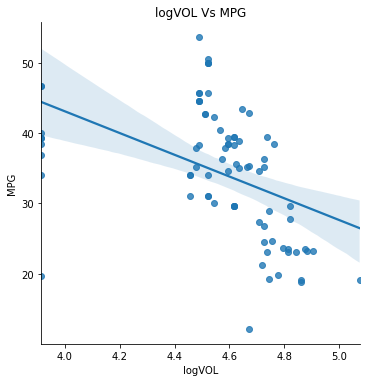

In [46]:
sns.lmplot(x='VOL',y='MPG',data=X_input)
plt.title('VOL Vs MPG')

sns.lmplot(x='logVOL',y='MPG',data=X_input)
plt.title('logVOL Vs MPG')
plt.show()

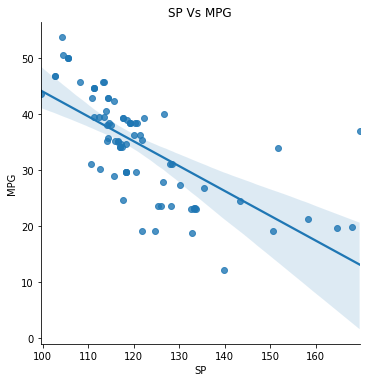

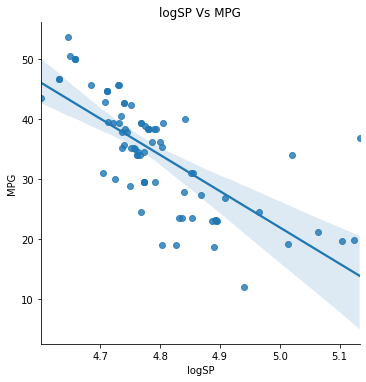

In [47]:
sns.lmplot(x='SP',y='MPG',data=X_input)
plt.title('SP Vs MPG')

sns.lmplot(x='logSP',y='MPG',data=X_input)
plt.title('logSP Vs MPG')
plt.show()

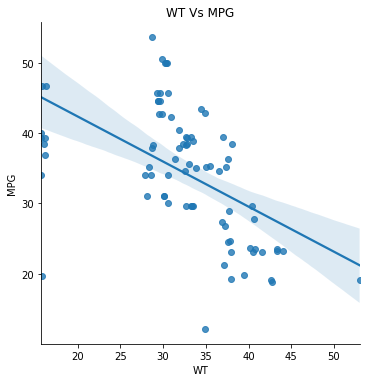

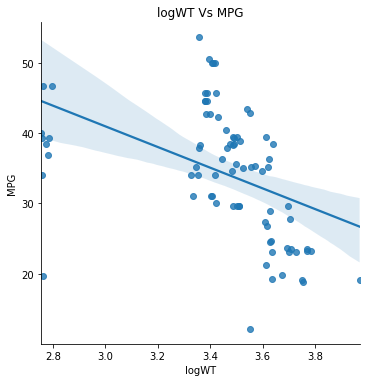

In [48]:
sns.lmplot(x='WT',y='MPG',data=X_input)
plt.title('WT Vs MPG')

sns.lmplot(x='logWT',y='MPG',data=X_input)
plt.title('logWT Vs MPG')
plt.show()

#### Linearity test also Failed

## Model Building

In [51]:
X=X_input[['logHP','logSP','logWT']]
y=X_input[['MPG']]

In [52]:
X.shape, y.shape

((81, 3), (81, 1))

In [53]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, shuffle=True, random_state=None)

In [54]:
X_train.shape, y_train.shape #Training data

((64, 3), (64, 1))

In [55]:
X_test.shape, y_test.shape #Testing data

((17, 3), (17, 1))

## Model Training

In [56]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

## Model testing.

#### Calculate the error for the Training data

In [57]:
y_pred_train=linear_model.predict(X_train)

#### Calculate the error for the Test data

In [58]:
y_pred_test=linear_model.predict(X_test)

## Model Evaluation

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
mean_squared_error(y_train, y_pred_train) # For training data

5.257828121383239

In [61]:
mean_squared_error(y_test, y_pred_test) # For training data

19.093266863857487

In [62]:
mean_absolute_error(y_train, y_pred_train)

1.4370698891427969

In [64]:
mean_absolute_error(y_test, y_pred_test)

2.8072842035469527

## Model Building using Statsmodel

In [66]:
model_1 = smf.ols(formula = 'MPG~logHP', data = X_input).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.7114
Adjusted R-square                  :  0.7078
Akaike information criterion (AIC) :  490.4986
Bayesian information criterion(BIC):  495.2875


In [71]:
model_2 = smf.ols(formula = 'MPG~logHP+logSP+logWT', data = X_input).fit()
print('R-square                           : ',round(model_2.rsquared,4))
print('Adjusted R-square                  : ',round(model_2.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_2.aic,4))
print('Bayesian information criterion(BIC): ',round(model_2.bic,4))

R-square                           :  0.9116
Adjusted R-square                  :  0.9081
Akaike information criterion (AIC) :  398.6808
Bayesian information criterion(BIC):  408.2586


In [72]:
model_3 = smf.ols(formula = 'MPG~logHP+logSP+logVOL+logWT', data = X_input).fit()
print('R-square                           : ',round(model_3.rsquared,4))
print('Adjusted R-square                  : ',round(model_3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_3.aic,4))
print('Bayesian information criterion(BIC): ',round(model_3.bic,4))

R-square                           :  0.9118
Adjusted R-square                  :  0.9071
Akaike information criterion (AIC) :  400.5013
Bayesian information criterion(BIC):  412.4736
